
## Introduccion minima a a la Regresion Lineal.

Carga de datos.


In [4]:
data = read.table("bodyfat.txt",header=TRUE)
head(data,4)

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2


Separamos las variables con las que trabajaremos.

In [5]:
data2 = data[,c(2,4)]
names(data2) = c("Grasa","Peso")
str(data2)

'data.frame':	252 obs. of  2 variables:
 $ Grasa: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ Peso : num  154 173 154 185 184 ...


Comprobamos que los datos esten corectamente extraidos.

In [7]:
head(data2,5)

,Grasa,Peso
,<dbl>,<dbl>
1,12.3,154.25
2,6.1,173.25
3,25.3,154.00
4,10.4,184.75
5,28.7,184.25


 
Ahora haremos la representacion grafica de as variables que extraimos, esta nos permite darnos una idea de los datos que tenemos.

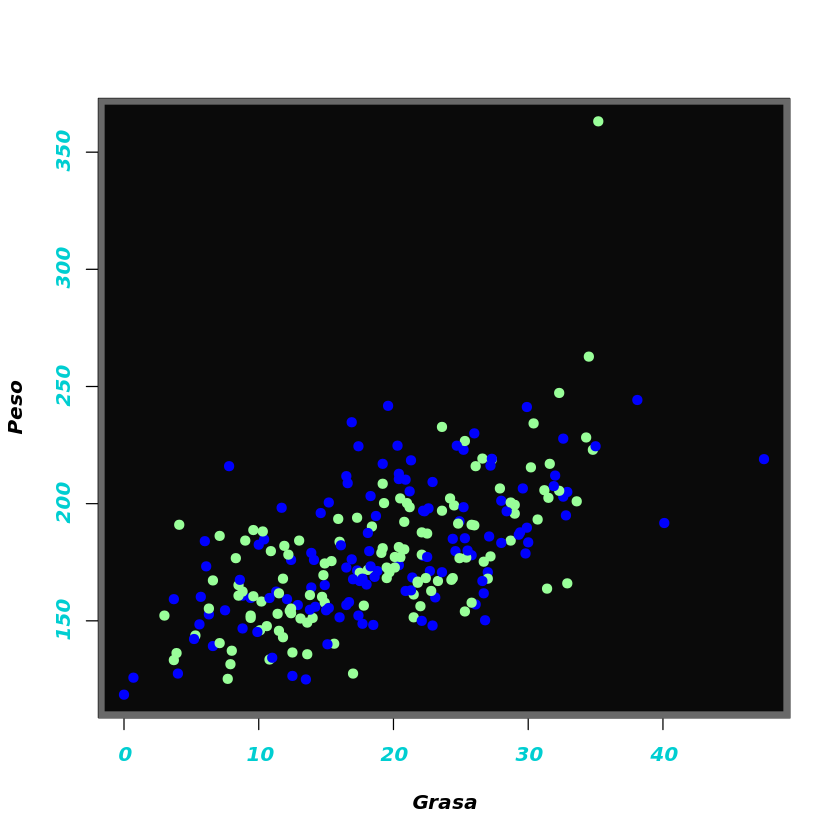

In [12]:
old.par <- par(no.readonly = TRUE)
 
par(bg = "white")
par(col.axis = "darkturquoise")
par(col.lab = "black")
par(font.axis = 4)
par(font.lab = 4)

 
plot(data2)
 
u <- par("usr")
 
rect(u[1], u[3], u[2], u[4], col = "gray4",
     border = "dimgray", lwd = 10)

points(data2, col = c("#99ff99","blue"), pch = 19)


# Calculo de Recta de regresion.

Es muy importante que para calcular la **recta de regresion**  tomando en cuenta los puntos $(x_i,y_i)i=1,2,3...n$ y si $(x_i)i=1...n$ es un vector e $(y_i)i=12,..n$ otro, entonces la rect de regresion se calcula mediante ``lm(y~x,data=dataframe)``.

## OBSERVACION:

Hay que tomar en cuenta que primero va el valor de las variables dependientes & despues las variables independientes.

In [13]:
regresion <-lm(Peso~Grasa,data=data2)
summary(regresion)


Call:
lm(formula = Peso ~ Grasa, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.799 -14.999  -3.469  11.860 149.709 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.7375     3.6684   37.55   <2e-16 ***
Grasa         2.1507     0.1756   12.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.28 on 250 degrees of freedom
Multiple R-squared:  0.3751,	Adjusted R-squared:  0.3726 
F-statistic:   150 on 1 and 250 DF,  p-value: < 2.2e-16


Esto significa que la recta de regresion para nuestro conjunto de datos es:

$y = 2.151x+137.738$

Ahora podemos hacer uso de esta recta en nuestro grafico usando la funcion ``abline``

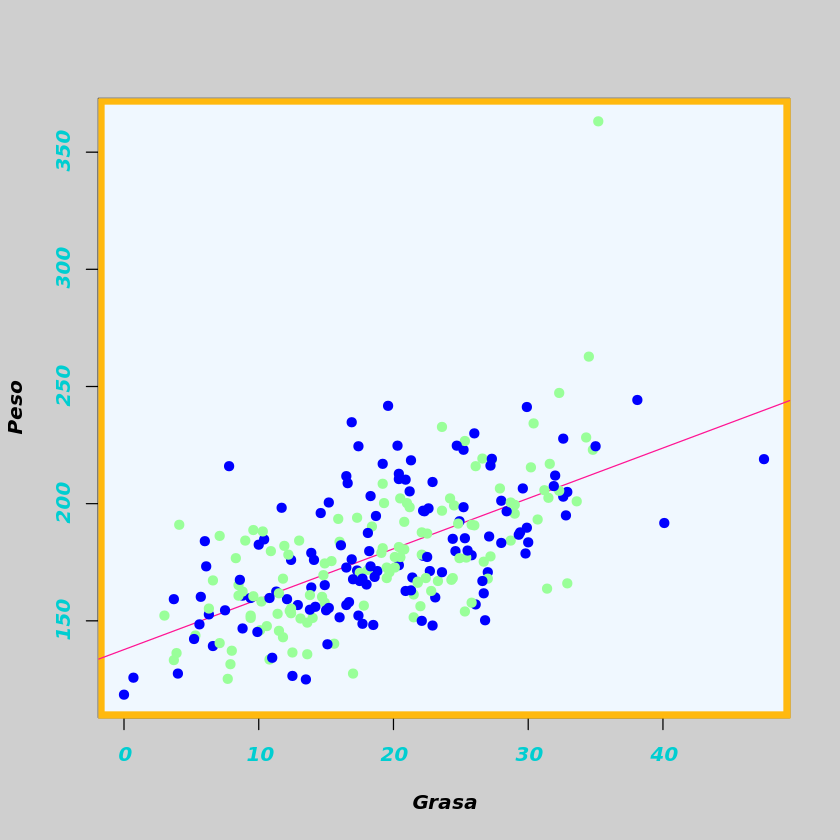

In [14]:
old.par <- par(no.readonly = TRUE)
 
par(bg = "gray81")
par(col.axis = "darkturquoise")
par(col.lab = "black")
par(font.axis = 4)
par(font.lab = 4)

 
plot(data2)
 
u <- par("usr")
 
rect(u[1], u[3], u[2], u[4], col = "aliceblue",
     border = "darkgoldenrod1", lwd = 10)
abline(regresion,col="deeppink")
points(data2, col = c("#99ff99","blue"), pch = 19)

## Coeficiente de Determinacion.

Hay que tener en cuenta que en la practica anterior solamente fue descriptivo , es decir solo hemos mostrado que estos datos son consistentes en una funcion lineal , pero no hemos deomstrado que la variable depeendiente sea una funcion aproximadamente lineal de la variable dependiente, para esto necesitamos una demostracion matematica.

Hay que entender que el **coef de determinacion**,$R^2$ nos es util para evaluar numeriacmente si la relacion lineal es significativa o no,por el momento y debido a qu eaun no tenemos conocimientos avanzados solo necesitamos saber que este coeficiente se encuentra en el intervalo $[0,1]$, si $R^2$ es mayor a 0.9 cibsuderamos que nuestro ajuste es bueno, en caso contrario no.


La funcion **summary** aplicada a **lm** nos muestra los contenidos de dicho objeto , entre ellos se encuentra **Multiple R-squared** que nos indica el coef de determinacion $R^2$, en este caso aplicaremos la funcion ``summary(lm(...)$r.squared)``.

In [16]:
summary(regresion)$r.squared

[1] 0.3750509

## Transformaciones logaritmicas.

Tomando en cuenta que no siempre tendremos dependencias lineales , i.e aveces nos encontraremos con expresiones exponenciales, o potenciales para eso sirven las transformaciones logaritmicas mediante un cambio de escala.

Es habitual encontrarnos graficos con sus ejes en escala lieal , pero aveces es conveniente dibujar alguno de los ejes en escala logaritmica, de modo que la misma distancia entre marcas significa el cociente entre sus valores, traducido podemos decir que un **eje en escala logaritmica representa el logarimo de sus valores en escala lineal**

Un grafico esta en escala **semilogaritmica** cuando su eje de abcisas esta en escala **lineal** y el de ordenadas en escala **logaritmica**

Un grafico esta en escala **doble logaritmica** cuando ambos ejes estan en escala logaritmica.

Si al representar unos puntos en escala semilogaritmica, observaremos aue siguen una recta , por lo tanto sigue una ley aproximadamente **exponencial**.

Si al representar unos puntos en escala doble logaritmica observamos que siguen aproximadamente una recta , esto querra decir que los valores siguen una ley aproximadamente **potencial**
